# Robô paralelo

Aqui serão registradas as simulações com o robô paralelo e o otimizador

In [141]:
include("comum.jl")
include("modelos.jl")
using Evolutionary, Plots;
pyplot();

In [142]:
Ts = 0.08
tend = 2.0
t0 = 0.0
r1 = 1.2
r2 = 0.6
popul  = 30   # população
iterac = 3;   #iterações

In [143]:
function gerador5(n)
    out = rand(n).*[1000., 100., 100., 10.]
end;

function gerador6(n)
    out = rand(n)
    for a = 1:n
        out[a] = out[a]*shuffle([50.,50.])[1]
    end    
    out
end

gerador6 (generic function with 1 method)

In [144]:
function custo(gain::Vector{Float64})
    kp = SMatrix{2,2}(diagm([gain[1], gain[2]]))
    kv = SMatrix{2,2}(diagm([gain[3], gain[4]]))
    x, v, t, a, ta, j, tj = parallelRobot(kp, kv, Ts, t0, tend, [r1, r2])
    erro1 =  - (x[1] - r1)
    erro2 =  - (x[2] - r2)
    sizeVector = length(erro1)

    erro_end_1 = sum(abs.(erro1[floor(Integer,sizeVector/3):end]))
    erro_end_2 = sum(abs.(erro2[floor(Integer,sizeVector/3):end]))

    jerk_1 = sum(abs.(j[1]))
    jerk_2 = sum(abs.(j[2]))

    erro_end = erro_end_1 + erro_end_2
    jerk = jerk_1 + jerk_2

    erro_end = erro_end*10.
    jerk = jerk*0.01

    out =  erro_end + jerk
    #println(out)
    out
end;

In [145]:
N = 4
result, fitness, cnt = ga(custo, N; initPopulation = gerador5, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)


LoadError: DomainError:

In [146]:
t_end_new = tend +2
kp = SMatrix{2,2}(diagm(result[1:2]))
kv = SMatrix{2,2}(diagm(result[3:4]))

x, v, t, a, ta, j, tj = robot2dof(kp, kv, Ts, t0, t_end_new, [r1, r2]);

table1 = "|-------- | junta 1  | junta 2 |
|--------| ------------- | ------------- |
|**erro final**| $(rad2deg(x[1][end] - r1)) graus  | $(rad2deg(x[2][end] - r2)) graus  |
|**total jerk **| $(sum(abs.(j[1])))  rad/sec³  | $(sum(abs.(j[2])))  rad/sec³  |
|**máximo jerk**| $(maximum(abs.(j[1])))  rad/sec³  | $(maximum(abs.(j[2])))  rad/sec³ |"

function plotx()
    p1 = plot(t,x[1], label = "desejado 1")
    p1= plot!([r1],seriestype= :hline, label = "referência");
    p2 = plot(t,x[2], label = "desejado 2")
    p2 = plot!([r2],seriestype= :hline, label = "referência");
    plot(p1,p2)
end

function plotj()
    p1 = plot(tj,j[1], label = "jerk 1")
    p2 = plot(tj,j[2], label = "jerk 2")
    plot(p1,p2)
end;

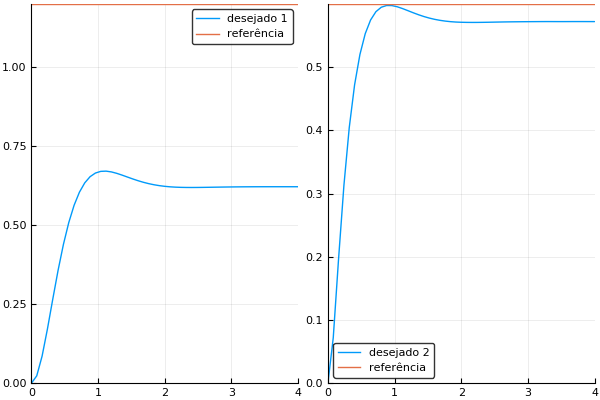

In [147]:
plotx()